# Collisional excitation / collisional de-excitation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import lss

from utils import *

In [2]:
element = lss.O1Inasan()
"""
13S3S - fast level
12P1D4 - 
"""
# element.keys = element.all_keys
# element.keys = ["12P3P4", "12P1D4", "13S3S"]
# element.keys = ["12P3P4", "12P1D4"]
element.keys = ["12P3P4", "13S3S"]

population_nlte_1 = [0.0 for _ in range(len(element.keys))]
population_nlte_1[0] = 1.0

delta_time = 0.01
# delta_time = 1.0e-20
# delta_time = 1.0e-30

count = int(1e4)
temperatures = np.full(count, 1.0e4)
electron_temperatures = np.full(count, 1.0e4)
electron_number_densities = np.linspace(1.0e1, 1.0e20, num=count)

In [3]:
ce_balance = ["ce_regemorter", "se_nist_o1"]

b_factors = calculate_b_factors(
    element=element,
    population_nlte_1=population_nlte_1,
    temperatures=temperatures,
    electron_temperatures=electron_temperatures,
    electron_number_densities=electron_number_densities,
    delta_time=delta_time,
    transitions_types=[
        *ce_balance,
    ]
)

In [4]:

b_factors.T[0][0]

1.0000053603738708

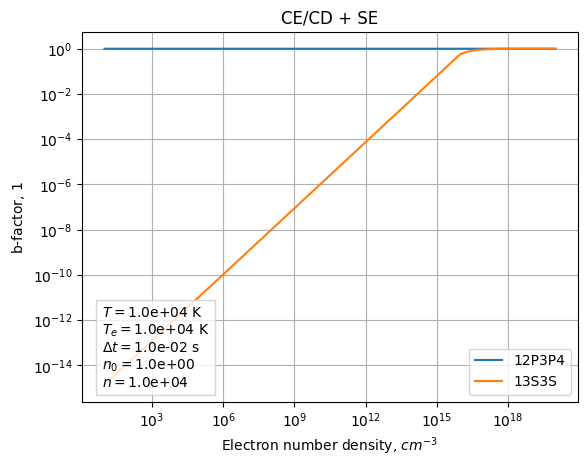

In [36]:
fig, ax = plt.subplots()

for i, key in enumerate(element.keys):
    plt.plot(
        electron_number_densities,
        b_factors.T[i],
        label=key,
    )
plt.title("CE/CD + SE")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Electron number density, $cm^{-3}$")
plt.ylabel("b-factor, $1$")
plt.legend(loc='lower right')
plt.text(
    0.04,
    0.04,
    f"$T = ${'{:.1e}'.format(temperatures[0])} K\n"
    f"$T_e = ${'{:.1e}'.format(electron_temperatures[0])} K\n"
    f"$\Delta t = ${'{:.1e}'.format(delta_time)} s\n"
    f"$n_0 = ${'{:.1e}'.format(population_nlte_1[0])}\n"
    f"$n = ${'{:.1e}'.format(count)}",
    transform = ax.transAxes,
    bbox={'facecolor': 'white', 'alpha': 0.8, 'edgecolor': (0.8, 0.8, 0.8)}
)
plt.grid()
plt.show()